### Import packages

In [330]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import os
import sys
import dill
import yaml
import numpy as np
import pandas as pd
import ast

import seaborn as sns
sns.set(style='ticks')

### Import submodular-optimization packages

In [331]:
sys.path.insert(1, "/home/grad3/harshal/Projects/submodular-optimization/submodular_optimization/")

### Visualizations directory

In [332]:
VIZ_DIR = os.path.abspath("/home/grad3/harshal/Projects/submodular-optimization/viz/")

### Plotting utilities

In [333]:
def set_style():
    # This sets reasonable defaults for font size for a paper
    sns.set_context("paper")    
    # Set the font to be serif
    sns.set(font='serif')#, rc={'text.usetex' : True})   
    # Make the background white, and specify the specific font family
    sns.set_style("white", {
        "font.family": "serif",
        "font.serif": ["Times", "Palatino", "serif"]
    })
    # Set tick size for axes
    sns.set_style("ticks", {"xtick.major.size": 6, "ytick.major.size": 6})

In [334]:
def set_size(fig, width=6, height=4):
    fig.set_size_inches(width, height)
    plt.tight_layout()

In [335]:
def save_fig(fig, filename):
    fig.savefig(os.path.join(VIZ_DIR, filename), dpi=600, format='pdf', bbox_inches='tight')

### Plots

In [336]:
df = pd.read_csv("/research/data-x/submodular-optimization/experiment_05.csv",
                header=0,
                index_col=False,
                converters={'sol': ast.literal_eval})
df.columns = ['Algorithm', 'sol', 'val', 'submodular_val', 'cost', 'user_sample_ratio', 'runtime', 'lazy_epsilon',
       'sample_epsilon']

#### Details

Algorithms:

1. Cost Distorted Greedy : (1 - 1/e) approximation of submodular func value with dynamic weights on cost func
2. Cost Distorted Lazy Greedy: Cost Distored Greedy with imperfect lazy evaluation.
3. Cost Scaled Greedy: (1/2) approximation of submodular func value with constant weights (2) on cost func
4. Cost Scaled Lazy Greedy: Cost Scaled Greedy with lazy evaluation
5. Distorted Greedy: (1 - 1/e) approximation of submodular func value with dynamic weights on submodular func
6. Distorted Lazy Greedy: Distorted Greedy with imperfect lazy evaluation.
7. Stochastic Distorted Greedy: (1 - 1/e - eps) approximation of submodular func value. It is distorted greedy with sampling 
8. Unconstrained Distorted Greedy: (1 - 1/e) approximation of submodular func value with single sample during each iteration

Num users: 4564
Num skills: 1639

#### Performance comparison

In [337]:
def plot_performance_comparison(df):
    ax = sns.lineplot(x='user_sample_ratio', y='val', data=df, hue='Algorithm', ci='sd')
    plt.xlabel('User sample size (% of total users)')
    plt.ylabel('Value of objective function')
    plt.title('Performance comparison')
    fig = plt.gcf()
    ax = plt.gca()
    return fig, ax

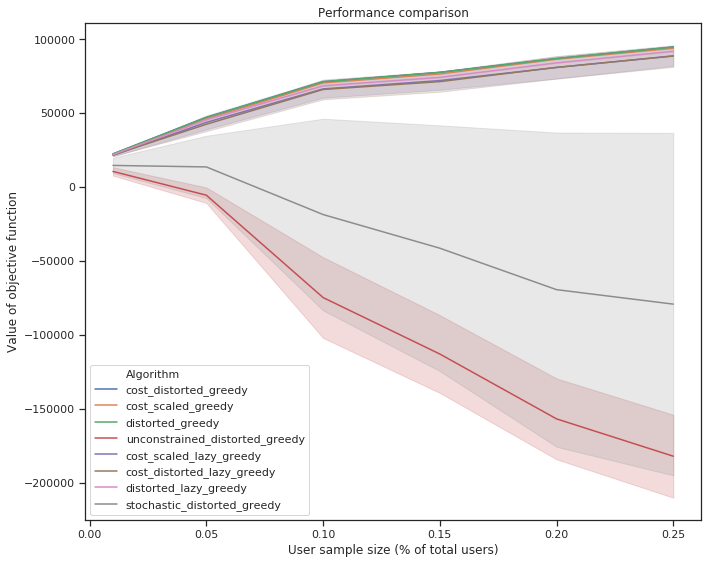

In [338]:
df0 = df[(df.Algorithm == 'distorted_greedy')
       |(df.Algorithm == 'distorted_lazy_greedy')
       |(df.Algorithm == 'cost_distorted_greedy')
       |(df.Algorithm == 'cost_distorted_lazy_greedy')]
df0 = df
set_style()
fig, axes = plot_performance_comparison(df0)
set_size(fig, 10, 8)

#### Runtime comparison

In [339]:
def plot_runtime_comparison(df):
    ax = sns.lineplot(x='user_sample_ratio', y='runtime', data=df, hue='Algorithm')
    plt.xlabel('User sample size (% of total users)')
    plt.ylabel('Value of objective function')
    plt.title('Runtime comparison')
    fig = plt.gcf()
    ax = plt.gca()
    return fig, ax

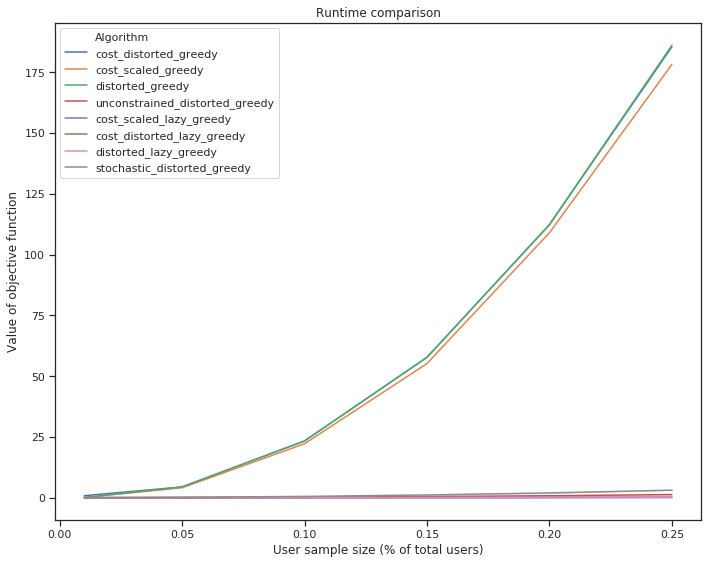

In [340]:
set_style()
fig, axes = plot_runtime_comparison(df)
set_size(fig, 10, 8)

#### Performance evaluation of lazy evaluation epsilon

In [341]:
df0 = df[((df.Algorithm=='cost_distorted_greedy') 
        | (df.Algorithm=='cost_scaled_greedy') 
        | (df.Algorithm=='cost_scaled_lazy_greedy')
        | (df.Algorithm=='cost_distorted_lazy_greedy') )
        & (df.user_sample_ratio == 0.25)]

In [342]:
df0.head()

,Algorithm,sol,val,submodular_val,cost,user_sample_ratio,runtime,lazy_epsilon,sample_epsilon
2370,cost_distorted_greedy,"{3073, 2434, 1155, 4101, 2569, 4362, 3468, 423...",94576,99000,4424,0.25,185.450580,NaN,NaN
2371,cost_scaled_greedy,"{2434, 1155, 4101, 2569, 4362, 3468, 4236, 180...",93726,98000,4274,0.25,178.159547,NaN,NaN
2473,cost_scaled_lazy_greedy,"{2176, 2434, 1155, 2569, 3211, 3468, 4236, 180...",93296,98000,4704,0.25,0.162238,0.01,NaN
2474,cost_scaled_lazy_greedy,"{2176, 2434, 1155, 2569, 3211, 3468, 4236, 180...",93296,98000,4704,0.25,0.161063,0.10,NaN
2475,cost_scaled_lazy_greedy,"{2176, 2434, 1155, 3211, 3468, 4236, 1806, 372...",88696,93000,4304,0.25,0.145771,0.30,NaN


In [343]:
def plot_lazy_evaluation_performance(df):
    # Cost Scaled Lazy Greedy
    g = sns.lineplot(x='lazy_epsilon', y='val', data=df[df.Algorithm=='cost_scaled_lazy_greedy'], color='blue',
                    label='cost_scaled_lazy_greedy')
    # Cost Distorted Lazy Greedy
    g = sns.lineplot(x='lazy_epsilon', y='val', data=df[df.Algorithm=='cost_distorted_lazy_greedy'], color='black',
                    label='cost_distorted_lazy_greedy')

    ax = plt.gca()
    fig = plt.gcf()
    
    # Cost Scaled Greedy
    cost_scaled_greedy_performance = df[df.Algorithm=='cost_scaled_greedy'].iloc[0]['val']
    ax.hlines(y=cost_scaled_greedy_performance, xmin=0.01, xmax=0.99, color='green', 
              label='cost_scaled_greedy')
    # Cost Distorted Greedy
    cost_distorted_greedy_performance = df[df.Algorithm=='cost_distorted_greedy'].iloc[0]['val']
    ax.hlines(y=cost_distorted_greedy_performance, xmin=0.01, xmax=0.99, color='red', 
              label='cost_distorted_greedy')
    
    # Legend
    labels = ['cost_scaled_lazy_greedy', 'cost_distorted_lazy_greedy', 'cost_scaled_greedy',
             'cost_distorted_greedy']
    handles, _ = ax.get_legend_handles_labels()
    plt.legend(handles=handles, labels=labels)

    plt.xlabel('Epsilon value during lazy evaluation')
    plt.ylabel('Value of objective function')
    plt.title('Performance of Lazy Greedy Algorithms')
    return fig, ax

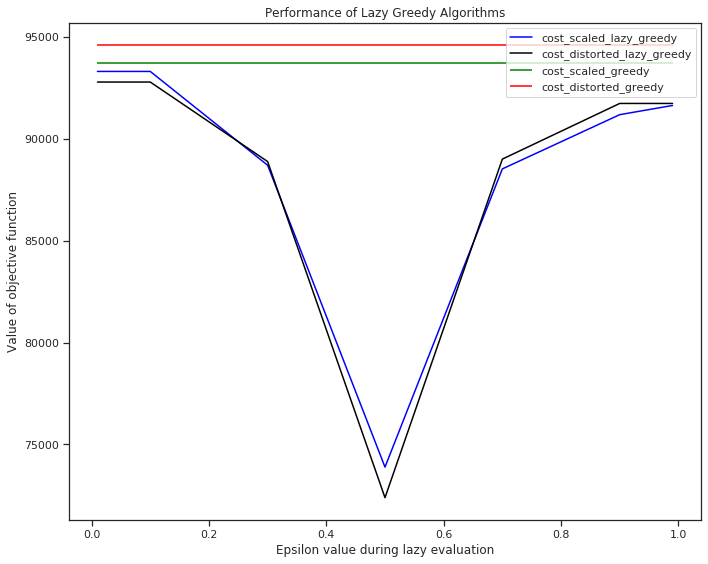

In [344]:
set_style()
fig, ax = plot_lazy_evaluation_performance(df0)
set_size(fig, 10, 8)

In [345]:
def plot_lazy_evaluation_runtime(df):
    # Cost Scaled Lazy Greedy
    g = sns.lineplot(x='lazy_epsilon', y='runtime', data=df[df.Algorithm=='cost_scaled_lazy_greedy'], color='blue',
                    label='cost_scaled_lazy_greedy')
    # Cost Distorted Lazy Greedy
    g = sns.lineplot(x='lazy_epsilon', y='runtime', data=df[df.Algorithm=='cost_distorted_lazy_greedy'], color='black',
                    label='cost_distorted_lazy_greedy')

    ax = plt.gca()
    fig = plt.gcf()
    
    # Cost Scaled Greedy
    cost_scaled_greedy_performance = df[df.Algorithm=='cost_scaled_greedy'].iloc[0]['runtime']
    ax.hlines(y=cost_scaled_greedy_performance, xmin=0.01, xmax=0.99, color='green', 
              label='cost_scaled_greedy')
    # Cost Distorted Greedy
    cost_distorted_greedy_performance = df[df.Algorithm=='cost_distorted_greedy'].iloc[0]['runtime']
    ax.hlines(y=cost_distorted_greedy_performance, xmin=0.01, xmax=0.99, color='red', 
              label='cost_distorted_greedy')
    
    # Legend
    labels = ['cost_scaled_lazy_greedy', 'cost_distorted_lazy_greedy', 'cost_scaled_greedy',
             'cost_distorted_greedy']
    handles, _ = ax.get_legend_handles_labels()
    plt.legend(handles=handles, labels=labels)
    
    plt.xlabel('Epsilon value during lazy evaluation')
    plt.ylabel('Runtime')
    plt.title('Runtime of Lazy Greedy Algorithms')
    return fig, ax

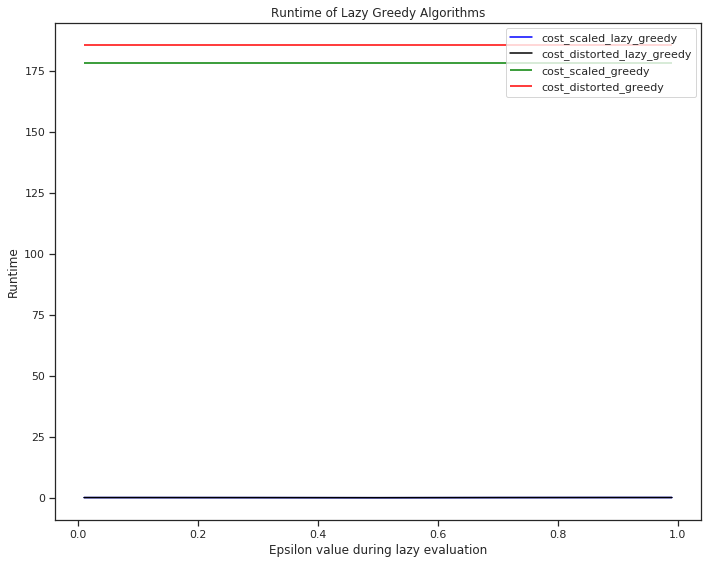

In [346]:
set_style()
fig, ax = plot_lazy_evaluation_runtime(df0)
set_size(fig, 10, 8)

#### Effect of sampling epsilon on performance of Stochastic Distorted Greedy

In [347]:
df0 = df[((df.Algorithm=='stochastic_distorted_greedy') 
        | (df.Algorithm=='distorted_greedy'))
        & (df.user_sample_ratio == 0.15)]

In [348]:
df0

,Algorithm,sol,val,submodular_val,cost,user_sample_ratio,runtime,lazy_epsilon,sample_epsilon
1424,distorted_greedy,"{2434, 3078, 4362, 3211, 3468, 4236, 1806, 372...",77455,83000,5545,0.15,57.736263,NaN,NaN
1546,stochastic_distorted_greedy,"{4097, 3073, 1540, 4101, 3078, 4105, 2569, 257...",64789,83000,18211,0.15,1.921015,NaN,0.01
1547,stochastic_distorted_greedy,"{3073, 4097, 4101, 3078, 2569, 1547, 2571, 359...",63789,82000,18211,0.15,1.882055,NaN,0.01
1548,stochastic_distorted_greedy,"{3073, 4097, 1540, 4101, 3078, 2569, 1547, 257...",66394,84000,17606,0.15,1.821447,NaN,0.01
1549,stochastic_distorted_greedy,"{3073, 4098, 4097, 4101, 3078, 4105, 2569, 257...",66258,83000,16742,0.15,1.832934,NaN,0.01
...,...,...,...,...,...,...,...,...,...
1891,stochastic_distorted_greedy,"{4097, 4098, 1, 2058, 2060, 12, 14, 15, 4113, ...",-60020,74000,134020,0.15,0.865559,NaN,0.99
1892,stochastic_distorted_greedy,"{1, 4098, 4105, 2058, 2060, 14, 15, 2066, 2067...",-135950,80000,215950,0.15,0.857834,NaN,0.99
1893,stochastic_distorted_greedy,"{4098, 4100, 4105, 14, 15, 4113, 2067, 20, 29,...",-147338,79000,226338,0.15,0.847317,NaN,0.99
1894,stochastic_distorted_greedy,"{4097, 1, 4100, 4101, 12, 14, 4113, 2066, 2067...",-129202,73000,202202,0.15,0.828275,NaN,0.99


In [349]:
def plot_sampling_performance(df):
    # Stochastic distorted greedy
    g = sns.lineplot(x='sample_epsilon', y='val', data=df[df.Algorithm=='stochastic_distorted_greedy'], 
                     color='blue', 
                     label='stochastic_distorted_greedy')
    
    ax = plt.gca()
    fig = plt.gcf()
    
    # Cost Distorted Greedy
    cost_distorted_greedy_performance = df[df.Algorithm=='distorted_greedy'].iloc[0]['val']
    ax.hlines(y=cost_distorted_greedy_performance, xmin=0.01, xmax=0.99, color='green', 
              label='distorted_greedy')
    
    # Legend
    labels = ['stochastic_distorted_greedy', 'distorted_greedy']
    handles, _ = ax.get_legend_handles_labels()
    plt.legend(handles=handles, labels=labels)
    
    plt.xlabel('Epsilon value during sampling')
    plt.ylabel('Objective function value')
    plt.title('Performance of Stochastic Greedy Algorithm')
    return fig, ax

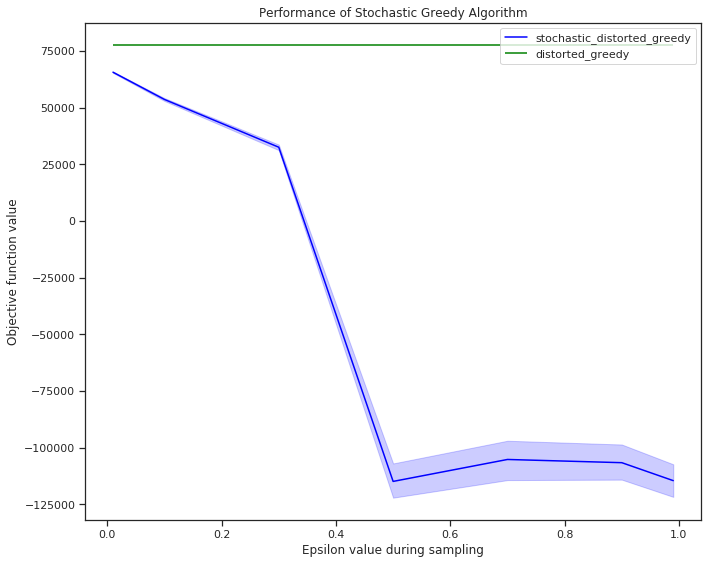

In [350]:
set_style()
fig, ax = plot_sampling_performance(df0)
set_size(fig, 10, 8)

#### Normalized plot compare performance of stochastic greedy algorithm

In [351]:
df = pd.read_csv("/research/data-x/submodular-optimization/experiment_06.csv",
                header=0,
                index_col=False,
                converters={'sol': ast.literal_eval})
df.columns = ['Algorithm', 'sol', 'val', 'submodular_val', 'cost', 'user_sample_ratio', 'runtime', 'lazy_epsilon',
       'sample_epsilon']

In [365]:
df0 = df[((df.Algorithm=='stochastic_distorted_greedy') 
        | (df.Algorithm=='distorted_greedy'))
        & (df.user_sample_ratio == 0.25)]

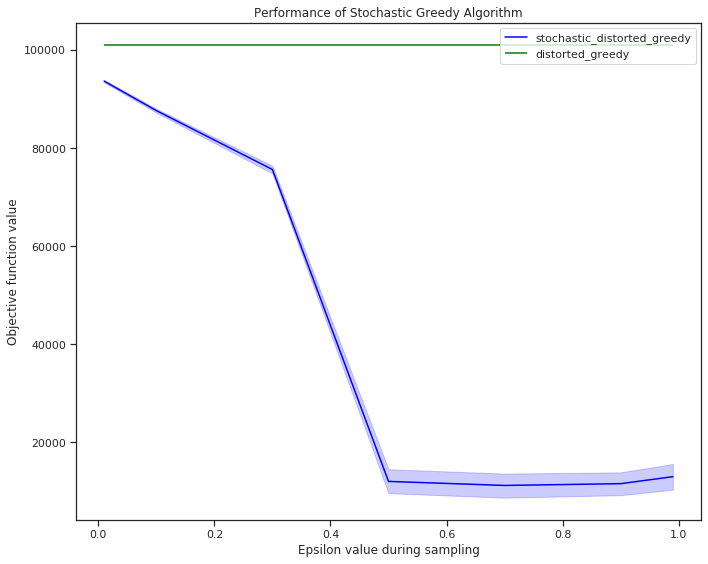

In [366]:
set_style()
fig, ax = plot_sampling_performance(df0)
set_size(fig, 10, 8)